# Project Autoscout24 sales analysis

## 1.1 Data
The file `autoscout24.csv` contains information from AutoScout24 about sold cars. The data needs to be analyzed and visualized.

In [2]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Normalizer

In [3]:
#load the data
data = pd.read_csv('autoscout24.csv', sep=';')

In [4]:
# first look an the given data
data.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year of sale
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [5]:
# info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mileage       46405 non-null  int64  
 1   make          46405 non-null  object 
 2   model         46262 non-null  object 
 3   fuel          46405 non-null  object 
 4   gear          46223 non-null  object 
 5   offerType     46405 non-null  object 
 6   price         46405 non-null  int64  
 7   hp            46376 non-null  float64
 8   year of sale  46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [6]:
sum_of_all_null_values = data.isnull().sum()[data.isnull().sum() > 0].sum()
print(f'The database has {sum_of_all_null_values} null values')
print(f'This correspond to {sum_of_all_null_values/data.shape[0]*100:.2f}% of the data -> we can drop them for further analysis')

The database has 354 null values
This correspond to 0.76% of the data -> we can drop them for further analysis


In [7]:
#drup the null values
data = data.dropna()
#reset the index
data.reset_index(drop=True, inplace=True)
data.isnull().sum()

mileage         0
make            0
model           0
fuel            0
gear            0
offerType       0
price           0
hp              0
year of sale    0
dtype: int64

## 1.2 Analysis
- **How many cars were sold? Over what period?**
- **What brands are included in the dataset?**
- **Are there correlations between the (numerical) features? (Scatterplots)**
- **Are there any trends or changes over the years?**
- **Think of additional interesting questions to explore using the given data.**

In [8]:
# First look at the data
print(f' In the timespann of {data["year of sale"].min()} to {data["year of sale"].max()} we have {data.shape[0]} cares sold')
print(f' The average price is {data["price"].mean():.2f}€')
print(f' The average mileage is {data["mileage"].mean():.2f} miles')
print(f' Folowing Brands are in the dataset:\n {data["make"].unique()}')

 In the timespann of 2011 to 2021 we have 46071 cares sold
 The average price is 16563.12€
 The average mileage is 71233.14 miles
 Folowing Brands are in the dataset:
 ['BMW' 'Volkswagen' 'SEAT' 'Renault' 'Peugeot' 'Toyota' 'Opel' 'Mazda'
 'Ford' 'Mercedes-Benz' 'Chevrolet' 'Audi' 'Fiat' 'Kia' 'Dacia' 'MINI'
 'Hyundai' 'Skoda' 'Citroen' 'Infiniti' 'Suzuki' 'SsangYong' 'smart'
 'Cupra' 'Volvo' 'Jaguar' 'Porsche' 'Nissan' 'Honda' 'Mitsubishi' 'Lexus'
 'Jeep' 'Maserati' 'Bentley' 'Land' 'Alfa' 'Subaru' 'Dodge' 'Microcar'
 'Lamborghini' 'Lada' 'Tesla' 'Chrysler' 'McLaren' 'Aston' 'Rolls-Royce'
 'Lancia' 'Abarth' 'DS' 'Daihatsu' 'Ligier' 'Ferrari' 'Aixam' 'Zhidou'
 'Morgan' 'Maybach' 'RAM' 'Alpina' 'Polestar' 'Brilliance' 'Piaggio'
 'FISKER' 'Others' 'Cadillac' 'Iveco' 'Isuzu' 'Corvette' 'Baic' 'DFSK'
 'Estrima' 'Alpine']


Text(0.5, 1.0, 'Correlation Matrix')

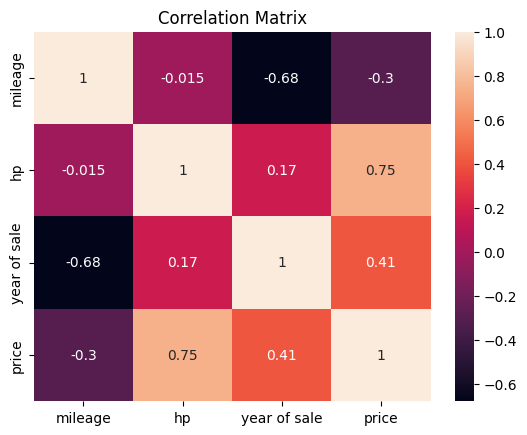

In [9]:
# Correlation of the numerical values showcased in a heatmap
sns.heatmap(data[["mileage","hp","year of sale","price"]].corr(), annot=True)
plt.title('Correlation Matrix')

We observe a strong negative correlation between the "year of sale" and the driven mileage, which makes sense since older cars have had more time to accumulate mileage.

The correlations with price are also quite intuitive.

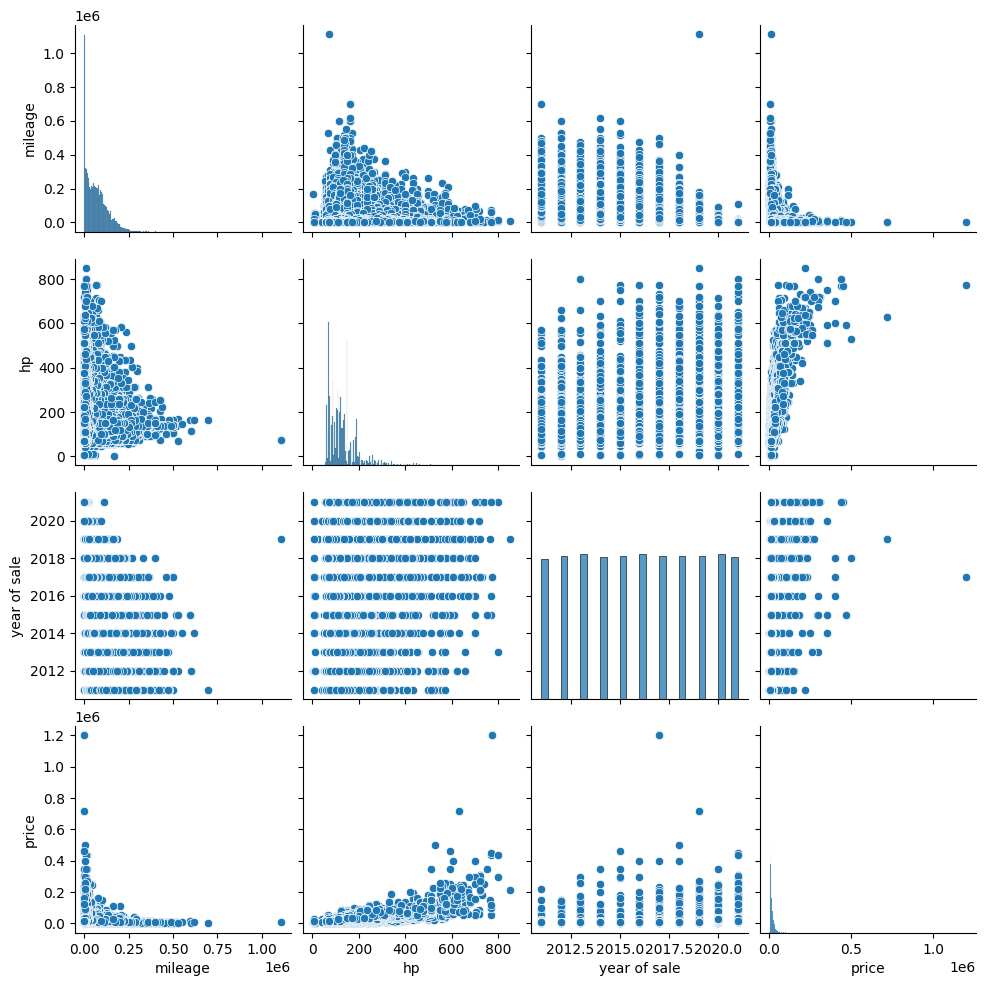

In [10]:
# as scatter-/pairplot
sns.pairplot(data[["mileage","hp","year of sale","price"]])

Text(0.5, 1.0, 'Horsepower over the years')

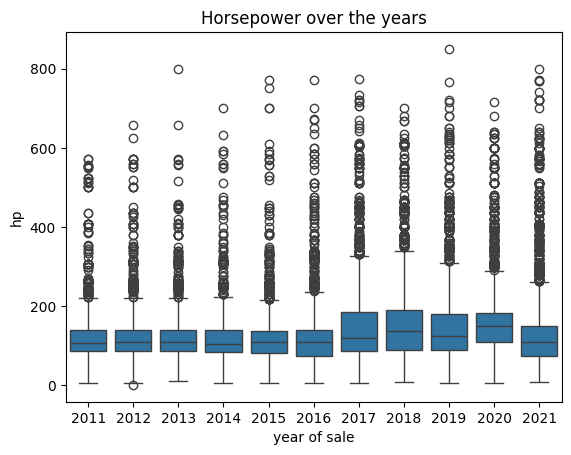

In [11]:
sns.boxplot(x='year of sale', y='hp', data=data)
plt.title('Horsepower over the years')

In the Years from 2017 to 2020 we se the average car had more hp. It looks like this trend exhausded in 2021. We should keep an eye on the continious years.

# Data preperation for Machine Learning

## 1.3 Machine Learning
- **Which 5 manufacturers had the most cars sold?**
- **Focus on the samples of these 5 manufacturers only.**
  - **What was the average price of a car from manufacturer X?**
  - **Train a model of your choice (e.g., Linear Regression) to predict the sale price of a car based on selected features.**
  - **What category of Machine Learning does this problem fall under?**
  - **How is the model's performance evaluated? What is the error metric?**
  - **Experiment with other models as well.**

In [12]:
# dict with number of cars sold per make
make_dict = { i: data[data["make"]==i].shape[0] for i in data["make"].unique()}
# get the top 5 brands by number of cars sold
top_5_brands = sorted(make_dict, key=make_dict.get, reverse=True)[:5]
print(f'The top 5 brands (by cares sold) are: {top_5_brands}')

The top 5 brands (by cares sold) are: ['Volkswagen', 'Opel', 'Ford', 'Skoda', 'Renault']


In [13]:
#reduce the data to the top 5 brands
data = data[data["make"].isin(top_5_brands)]
data.reset_index(drop=True, inplace=True)
data.isnull().sum()

mileage         0
make            0
model           0
fuel            0
gear            0
offerType       0
price           0
hp              0
year of sale    0
dtype: int64

In [15]:
top_5_brands

['Volkswagen', 'Opel', 'Ford', 'Skoda', 'Renault']

Text(0, 0.5, 'Price in €')

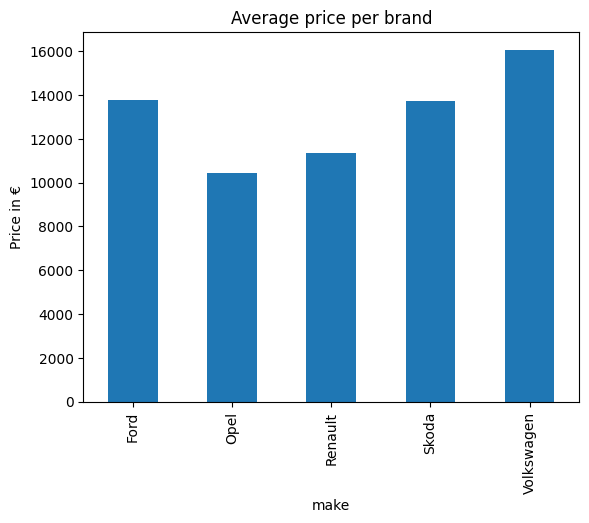

In [15]:
# average price per brand
data.groupby('make')['price'].mean().plot(kind='bar')
plt.title('Average price per brand')
plt.ylabel('Price in €')

In [16]:
# Change the categorical data to numerical data
dummy_data = pd.get_dummies(data=data, columns=["make","model","fuel","gear","offerType"])


In [17]:
# scale the data of the columns "mileage","hp","year of sale"
scale_data = dummy_data[["mileage","hp","year of sale"]]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(scale_data)
scaled_data = pd.DataFrame(scaled_data, columns=["mileage","hp","year of sale"])

In [18]:
# concatenate the scaled data with the dummy data
data = pd.concat([scaled_data, dummy_data.drop(columns=["mileage","hp","year of sale"])], axis=1)

In [19]:
data.head()

,mileage,hp,year of sale,price,make_Ford,make_Opel,make_Renault,make_Skoda,make_Volkswagen,model_Adam,...,fuel_LPG,fuel_Others,gear_Automatic,gear_Manual,gear_Semi-automatic,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
0,0.307543,0.107845,-1.628191,6877,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
1,0.361964,-0.160562,-1.628191,6950,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,0.293042,0.309150,-1.628191,6970,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,0.862955,-0.026358,-1.628191,6972,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,-1.176157,-0.697376,-1.628191,6990,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


<Axes: xlabel='price', ylabel='Count'>

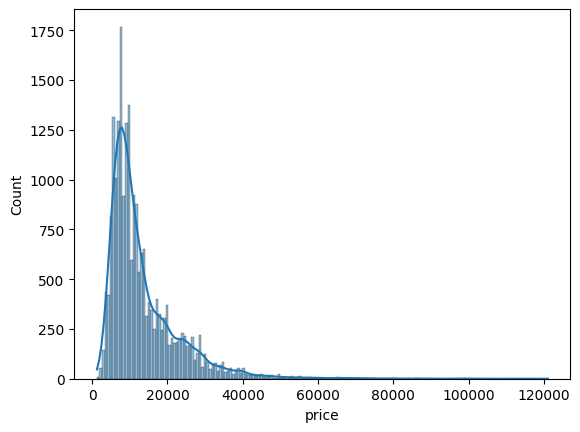

In [20]:
sns.histplot(data["price"], kde=True)

In [21]:
# dict of key->brand and value -> db filtered by brand
data_dict = {i: data[data["make_"+i]==1] for i in top_5_brands}

In [22]:
data_dict["Volkswagen"]

,mileage,hp,year of sale,price,make_Ford,make_Opel,make_Renault,make_Skoda,make_Volkswagen,model_Adam,...,fuel_LPG,fuel_Others,gear_Automatic,gear_Manual,gear_Semi-automatic,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
0,0.307543,0.107845,-1.628191,6877,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
6,0.166690,-0.272398,-1.628191,6990,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
7,-0.025383,-1.278925,-1.628191,6999,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
11,0.134197,-0.272398,-1.303138,7850,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
12,1.916683,-0.272398,-1.303138,7900,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21758,-1.084986,1.941961,1.622339,77470,False,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False
21759,-1.177021,-0.160562,1.622339,23990,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
21763,-1.177021,0.734128,1.622339,31450,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
21768,-1.176221,0.734128,1.622339,32490,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False


# ML Lienar Regression and Random Forst

In [288]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV

In [289]:
#Train Test Split
X = data.drop(columns=["price"])
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [290]:
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)

LinearRegression()

In [291]:
lr_y_pred = lr_clf.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, lr_y_pred)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, lr_y_pred)}')
print(f'R2 Score: {r2_score(y_test, lr_y_pred)}')

Mean Squared Error: 3.3905510979856767e+25
Mean Absolute Error: 92904888201.87444
R2 Score: -3.9290504391659245e+17


# Very bad results
 - Let's plot the results to visualize the relation between prediction and true values
 - The Linear Regression model cant handle the hyperbolic price values.

Text(0, 0.5, 'Predicted Value')

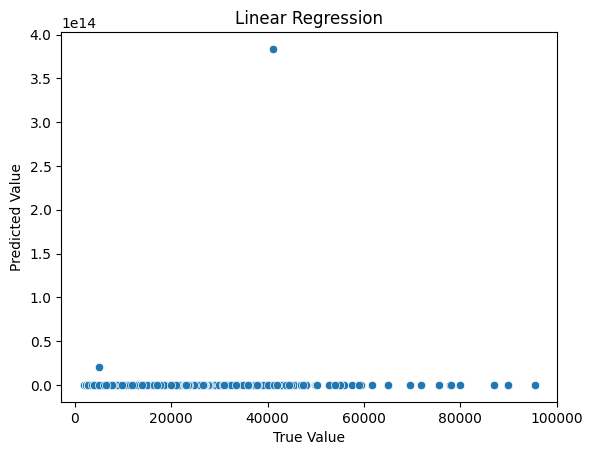

In [292]:
sns.scatterplot(x=y_test, y=lr_y_pred)
plt.title('Linear Regression')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')

In [293]:
rf_clf = RandomForestRegressor()
rf_clf.fit(X_train, y_train)
y_rf_pred = rf_clf.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, y_rf_pred)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_rf_pred)}')
print(f'R2 Score: {r2_score(y_test, y_rf_pred)}')

Mean Squared Error: 5105570.0142824715
Mean Absolute Error: 1313.0174672063786
R2 Score: 0.9408354526238328


Text(0, 0.5, 'Predicted Value')

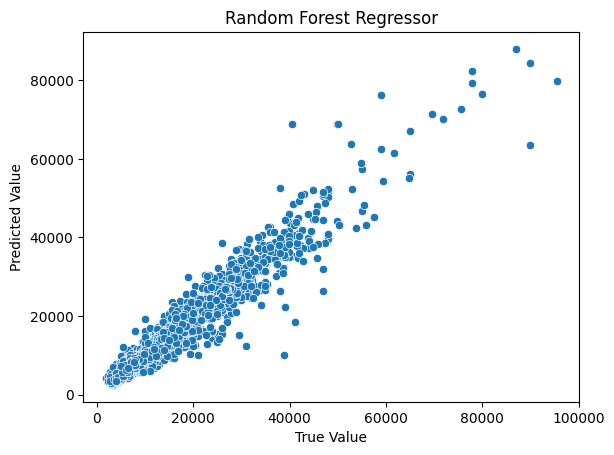

In [294]:
sns.scatterplot(x=y_test, y=y_rf_pred)
plt.title('Random Forest Regressor')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')

# Hyperparametertuning
Tryed in a previous run of this Notebook to Hypertune the RF_Model for even better prediction. The R2-Score increesed by 0.01% but it took my PC 3h for Calculation -> So the folowing Codecells are not executed on this updatet Data

In [23]:
# make a dictionary of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200],
    'max_features': [1.0,'sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [24]:
gs_model = GridSearchCV(estimator=rf_clf,
                        param_grid=param_grid,
                        cv=5, n_jobs=-1,
                        verbose=2, 
                        scoring='neg_mean_squared_error'
                        )
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': [1.0, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [25]:
print("Beste Parameter:", gs_model.best_params_)  # Gibt die besten gefundenen Parameter aus
print("Bester Kreuzvalidierungs-Score: {:.2f}".format(gs_model.best_score_))  # Gibt den besten Score aus

# Vorhersagen mit dem besten Modell
best_model = gs_model.best_estimator_  # Zieht sich direkt das beste Modell aus
y_pred = best_model.predict(X_test)  # Vorhersagen auf den Testdaten

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

Beste Parameter: {'max_depth': 30, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Bester Kreuzvalidierungs-Score: -6344536.49
Mean Squared Error: 6319382.224719596
Mean Absolute Error: 1504.8353140518698
R2 Score: 0.94307448272454


Text(0, 0.5, 'Predicted Value')

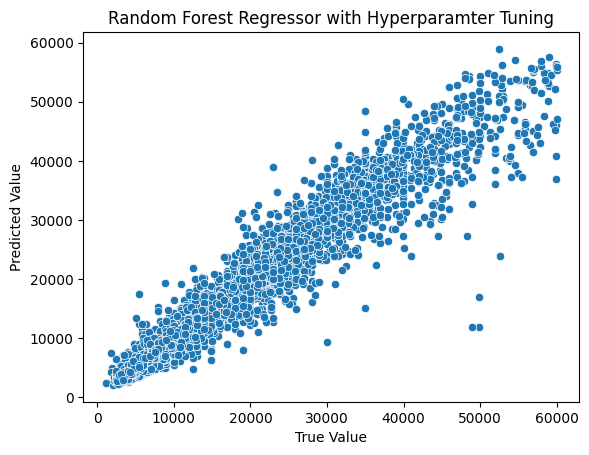

In [28]:
sns.scatterplot(x=y_test, y=y_rf_pred)
plt.title('Random Forest Regressor with Hyperparamter Tuning')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')